In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy 
from tensorflow.keras import layers as l
import numpy as np
import pandas as pd
from numpy import loadtxt


In [7]:

model = keras.models.load_model('model2.h5')


In [8]:
path= "/Users/shahrasm/Documents/Graduation_project/"
modelpath=path+"bestmodel"
col=range(71)


In [9]:
test_data = pd.read_csv(path+'test_data.csv',names=col)
Xts = test_data.loc[:,1:]
yts = test_data.loc[:,0]

In [10]:
ts=[]
for c in range(1,71):
    e=Xts[c]
    meanc=np.mean(e) 
    varc=np.var(e) 
    normalize=l.Normalization(mean=meanc,variance=varc)
    e=normalize(e)
    ts.append(e)

In [11]:
Xts=np.array(ts)
Xts=np.transpose(Xts)

In [14]:
predictions = (model.predict(Xts) > 0.5).astype("int32")
for i in range(166):
	print('%d (expected %d)' % ( predictions[i], yts[i]))

0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
0 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expected 1)
1 (expecte

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
y_actu = yts
y_pred = predictions.reshape(-1)

In [17]:
array=confusion_matrix(y_actu,y_pred)

In [18]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

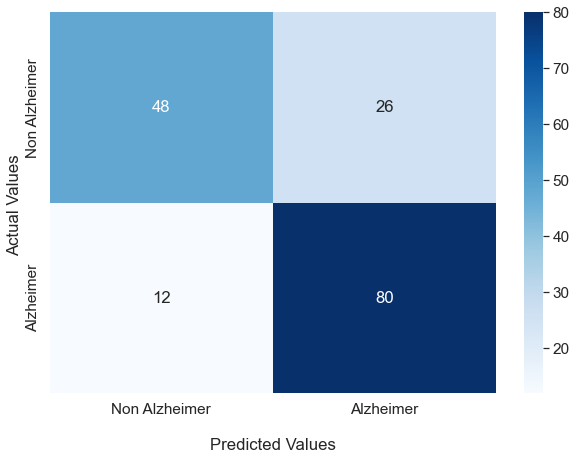

In [19]:
df_cm = pd.DataFrame(array, range(2), range(2))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
ax=sn.heatmap(df_cm, annot=True, cmap='Blues') # font size
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
ax.xaxis.set_ticklabels(['Non Alzheimer','Alzheimer'])
ax.yaxis.set_ticklabels(['Non Alzheimer','Alzheimer'])
plt.savefig("confusion_matrix2.png", dpi=300, bbox_inches='tight')
plt.show()


In [31]:

def extract_fecter (a):
    import opensmile
    import glob
    import pandas as pd
    import csv
    import numpy as np
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.ComParE_2016,
        feature_level=opensmile.FeatureLevel.Functionals,
    )
    y = smile.process_file(a)
    new=y[['audspecRasta_lengthL1norm_sma_lpc1',
       'audspec_lengthL1norm_sma_de_quartile3',
       'audspec_lengthL1norm_sma_de_skewness',
       'audspec_lengthL1norm_sma_de_lpc1',
       'audSpec_Rfilt_sma[1]_upleveltime25', 'audSpec_Rfilt_sma[8]_lpc1',
       'audSpec_Rfilt_sma[12]_iqr1-3', 'audSpec_Rfilt_sma[14]_iqr1-3',
       'audSpec_Rfilt_sma[15]_iqr2-3', 'audSpec_Rfilt_sma[17]_iqr2-3',
       'audSpec_Rfilt_sma[17]_skewness', 'audSpec_Rfilt_sma[18]_maxSegLen',
       'pcm_fftMag_spectralRollOff25.0_sma_maxSegLen',
       'pcm_fftMag_spectralRollOff50.0_sma_upleveltime75',
       'pcm_fftMag_spectralVariance_sma_risetime',
       'pcm_fftMag_spectralKurtosis_sma_lpc0',
       'pcm_fftMag_spectralSlope_sma_iqr1-2',
       'pcm_fftMag_psySharpness_sma_lpc3', 'mfcc_sma[2]_range',
       'mfcc_sma[4]_lpc2', 'mfcc_sma[6]_skewness', 'mfcc_sma[7]_quartile2',
       'mfcc_sma[7]_quartile3', 'mfcc_sma[7]_iqr2-3',
       'mfcc_sma[9]_pctlrange0-1', 'mfcc_sma[11]_range',
       'mfcc_sma[12]_percentile1.0', 'mfcc_sma[14]_quartile1',
       'audSpec_Rfilt_sma_de[0]_quartile3',
       'audSpec_Rfilt_sma_de[3]_meanSegLen',
       'audSpec_Rfilt_sma_de[8]_pctlrange0-1',
       'audSpec_Rfilt_sma_de[9]_minPos',
       'audSpec_Rfilt_sma_de[13]_percentile99.0',
       'audSpec_Rfilt_sma_de[17]_pctlrange0-1',
       'audSpec_Rfilt_sma_de[19]_percentile1.0',
       'audSpec_Rfilt_sma_de[19]_segLenStddev',
       'audSpec_Rfilt_sma_de[24]_lpc3', 'audSpec_Rfilt_sma_de[25]_skewness',
       'audSpec_Rfilt_sma_de[25]_lpc3',
       'pcm_fftMag_spectralRollOff25.0_sma_de_lpc4',
       'pcm_fftMag_spectralFlux_sma_de_stddev',
       'pcm_fftMag_spectralSkewness_sma_de_pctlrange0-1',
       'mfcc_sma_de[1]_percentile1.0', 'mfcc_sma_de[4]_meanSegLen',
       'mfcc_sma_de[4]_upleveltime25', 'mfcc_sma_de[5]_skewness',
       'mfcc_sma_de[6]_upleveltime50', 'mfcc_sma_de[13]_percentile1.0',
       'mfcc_sma_de[14]_kurtosis', 'F0final_sma_upleveltime75',
       'jitterDDP_sma_flatness', 'voicingFinalUnclipped_sma_de_lpc2',
       'jitterLocal_sma_de_lpc1', 'logHNR_sma_de_lpc0',
       'audspec_lengthL1norm_sma_linregc1',
       'audSpec_Rfilt_sma[2]_stddevFallingSlope',
       'audSpec_Rfilt_sma[15]_qregerrQ', 'audSpec_Rfilt_sma[18]_amean',
       'audSpec_Rfilt_sma[19]_rqmean',
       'pcm_fftMag_spectralRollOff50.0_sma_qregerrQ',
       'pcm_fftMag_spectralEntropy_sma_flatness',
       'pcm_fftMag_spectralVariance_sma_flatness',
       'pcm_fftMag_spectralKurtosis_sma_peakMeanMeanDist', 'mfcc_sma[7]_amean',
       'audSpec_Rfilt_sma_de[2]_flatness',
       'audSpec_Rfilt_sma_de[7]_stddevFallingSlope',
       'audSpec_Rfilt_sma_de[12]_peakMeanRel',
       'audSpec_Rfilt_sma_de[12]_minRangeRel',
       'pcm_fftMag_spectralSkewness_sma_de_peakMeanAbs',
       'mfcc_sma_de[3]_meanRisingSlope']]
    
    new.to_csv("data_record.csv")
    data = pd.DataFrame(pd.read_csv("data_record.csv"))
    data.drop(['file','end','start'],axis='columns', inplace=True)
    Fdata=data.to_numpy().reshape(-1)
    
    result=(model.predict(Fdata) > 0.5).astype("int32")
    
    return result
